In [47]:
import os
import shutil #file management module
import cv2 #openCV module
import pywt #wavelet transform module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from sklearn.metrics import classification_report, confusion_matrix

from PIL import Image

In [48]:
#define paths which contain training and testing images
training_data_path = './images/training/'
testing_data_path = './images/testing/'

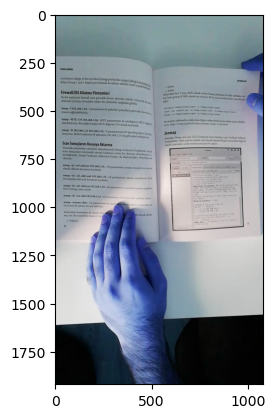

In [49]:
# Example of an image of pages that are NOT being flipped

img_test = cv2.imread(r"C:\Users\krodr\Downloads\AI machine learning projects\images\testing\notflip\0001_000000002.jpg")

plt.imshow(img_test, cmap = 'gray') 





In [50]:
img_test.shape

(1920, 1080, 3)

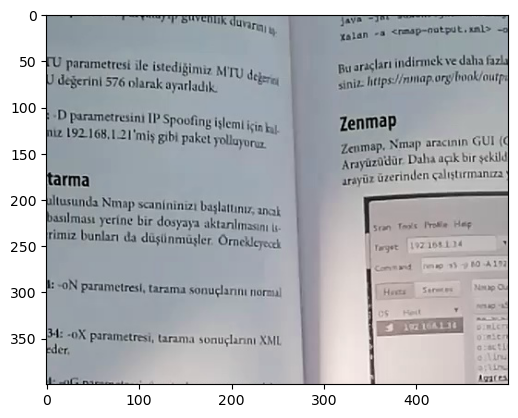

In [51]:
#  crop each image to remove any extraneuous and irrelevent objects such as hands or  dark areas  


img_test_crop = img_test[500:900, 250:750]
plt.imshow(img_test_crop)

In [52]:
img_test_crop.shape

(400, 500, 3)

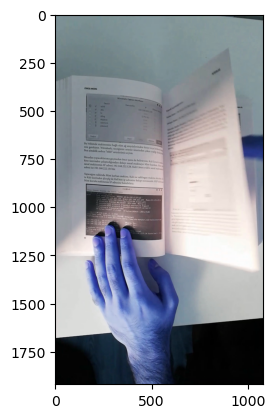

In [53]:
#example of image where page is being flipped
img_test2 = cv2.imread(r"C:\Users\krodr\Downloads\AI machine learning projects\images\testing\flip\0002_000000012.jpg")

plt.imshow(img_test2, cmap = 'gray')

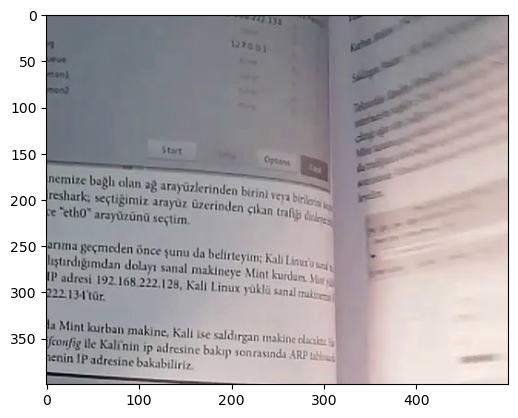

In [54]:
# cropped portion of the above image 
img_test2_crop = img_test2[500:900, 250:750]

plt.imshow(img_test2_crop)

In [55]:
#create a list of directories that contain TRAINING images
training_img_dirs = []
for entry in os.scandir(training_data_path):
    if entry.is_dir: #if entry is a directory
        training_img_dirs.append(entry.path) #append the directory path to the list

In [56]:
training_img_dirs

['./images/training/flip', './images/training/notflip']

In [57]:
#create a list of directories that containing TESTING images
testing_img_dirs = []

for entry in os.scandir(testing_data_path):
    if entry.is_dir:
        testing_img_dirs.append(entry.path)

In [58]:
testing_img_dirs

['./images/testing/flip',
 './images/testing/myflips',
 './images/testing/notflip']

In [59]:
# for the training data, create an array consisting of the stacked arrays of cropped and resized original images along with and 
# list of labels (flip = 1 or nonflip = 0) for each image

X_train = np.empty(shape = (0,200,250,3)) # independent variable array
y_train = [] # dependent variable list

for img_dir in training_img_dirs:
    for file in os.scandir(img_dir):
        fil = file.path
        print(fil[23:])
        img = cv2.imread(file.path)[500:900, 250:750] #read the image file and then crop it to the apparoximate centre
        scaled_img = cv2.resize(img, (250,200)) #resize the image to about half of the cropped image
        X_train = np.vstack((X_train, scaled_img.reshape(1,200,250,3)))#stack to X_train
        #create y list (dependent variable)
        if 'notflip' in img_dir:
            y_train.append(0)
        else:
            y_train.append(1)   

0001_000000010.jpg
0001_000000011.jpg
0001_000000012.jpg
0001_000000013.jpg
0001_000000014.jpg
0001_000000015.jpg
0001_000000016.jpg
0001_000000017.jpg
0001_000000018.jpg
0001_000000019.jpg
0001_000000021.jpg
0001_000000022.jpg
0001_000000023.jpg
0001_000000024.jpg
0001_000000025.jpg
0002_000000009.jpg
0002_000000010.jpg
0002_000000011.jpg
0002_000000014.jpg
0002_000000016.jpg
0002_000000018.jpg
0002_000000019.jpg
0002_000000020.jpg
0002_000000021.jpg
0003_000000001.jpg
0003_000000002.jpg
0003_000000003.jpg
0003_000000004.jpg
0003_000000006.jpg
0003_000000007.jpg
0003_000000009.jpg
0003_000000010.jpg
0003_000000011.jpg
0003_000000012.jpg
0003_000000013.jpg
0003_000000014.jpg
0003_000000015.jpg
0003_000000016.jpg
0003_000000017.jpg
0003_000000018.jpg
0003_000000019.jpg
0003_000000020.jpg
0003_000000021.jpg
0003_000000023.jpg
0003_000000024.jpg
0003_000000026.jpg
0004_000000005.jpg
0004_000000007.jpg
0004_000000008.jpg
0004_000000009.jpg
0004_000000010.jpg
0004_000000011.jpg
0004_0000000

In [60]:
y_train = np.array(y_train).astype('float16')
y_train

array([1., 1., 1., ..., 0., 0., 0.], dtype=float16)

In [61]:
X_train.shape

(2392, 200, 250, 3)

In [62]:
#normalize X_train
X_train_norm = X_train/255

In [63]:
# Save the normalized array above so that it can be loaded later without having to rerun the code
np.save('X_train_norm.npy',X_train_norm)

In [64]:
test_array = np.load('X_train_norm.npy')

In [65]:
False in (test_array == X_train_norm) # saved array loaded into test_array is identical to the original array

False

In [66]:
np.save('y_train.npy',y_train)

In [67]:
X_train_norm = np.load('X_train_norm.npy')
y_train = np.load('y_train.npy')

In [68]:
#create similar arrays of stacked images as above but now for the testing images as well as labels

X_test = np.empty(shape = (0,200,250,3)) # independent variable list
y_test = [] # dependent varibale list

for img_dir in testing_img_dirs:
    for file in os.scandir(img_dir):
        print(file.path) #print the file path just to keep track of the progress
        img = cv2.imread(file.path)[500:900, 250:750] #read the image file
        scaled_img = cv2.resize(img, (250,200)) #resize the image
        X_test = np.vstack((X_test , scaled_img.reshape(1,200,250,3))) #stack to X_test
        #create the y list
        if 'notflip' in img_dir:
            y_test.append(0)
        else:
            y_test.append(1)

./images/testing/flip\0001_000000020.jpg
./images/testing/flip\0002_000000012.jpg
./images/testing/flip\0002_000000013.jpg
./images/testing/flip\0002_000000015.jpg
./images/testing/flip\0002_000000017.jpg
./images/testing/flip\0003_000000005.jpg
./images/testing/flip\0003_000000008.jpg
./images/testing/flip\0003_000000022.jpg
./images/testing/flip\0003_000000025.jpg
./images/testing/flip\0004_000000006.jpg
./images/testing/flip\0004_000000013.jpg
./images/testing/flip\0004_000000014.jpg
./images/testing/flip\0004_000000027.jpg
./images/testing/flip\0005_000000003.jpg
./images/testing/flip\0005_000000008.jpg
./images/testing/flip\0005_000000018.jpg
./images/testing/flip\0005_000000023.jpg
./images/testing/flip\0005_000000028.jpg
./images/testing/flip\0006_000000001.jpg
./images/testing/flip\0006_000000006.jpg
./images/testing/flip\0006_000000008.jpg
./images/testing/flip\0006_000000012.jpg
./images/testing/flip\0006_000000021.jpg
./images/testing/flip\0006_000000022.jpg
./images/testing

In [69]:
X_test.shape

(603, 200, 250, 3)

In [70]:
y_test = np.array(y_test).astype('float16')

In [71]:
X_test_norm = X_test/255

In [72]:
np.save('X_test_norm.npy',X_test_norm)
np.save('y_test.npy', y_test)

In [73]:
X_test_norm = np.load('X_test_norm.npy')
y_test = np.load('y_test.npy')

In [74]:
# specify Random Horizontal Flip and Random Rotation (a random amount in the range -10%*2pi and +10%*2pi - see docs)
data_aug = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1)
    ])

In [75]:
#setup the model
model3 = Sequential()

model3.add(data_aug) # add the augmentation layers created above

model3.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (200,250,3)))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
          
model3.add(Flatten())
model3.add(Dense(64, activation = 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(32, activation = 'relu'))
model3.add(Dropout(0.3))
model3.add(Dense(16, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation = 'sigmoid'))

In [76]:
#compile the model
model3.compile(loss='binary_crossentropy',
              optimizer='adam',
         metrics=['accuracy'])

In [77]:
model3.fit(X_train_norm, y_train, epochs = 50) #needed about 50 epochs and reached 91.5% accuracy

Epoch 1/50
75/75 [==============================] - 54s 528ms/step - loss: 0.7582 - accuracy: 0.5138
Epoch 2/50
75/75 [==============================] - 36s 486ms/step - loss: 0.6951 - accuracy: 0.4946
Epoch 3/50
75/75 [==============================] - 36s 486ms/step - loss: 0.6938 - accuracy: 0.5247
Epoch 4/50
75/75 [==============================] - 37s 490ms/step - loss: 0.6878 - accuracy: 0.5602
Epoch 5/50
75/75 [==============================] - 37s 492ms/step - loss: 0.6704 - accuracy: 0.5916
Epoch 6/50
75/75 [==============================] - 37s 494ms/step - loss: 0.6719 - accuracy: 0.6171
Epoch 7/50
75/75 [==============================] - 37s 489ms/step - loss: 0.6617 - accuracy: 0.5999
Epoch 8/50
75/75 [==============================] - 38s 507ms/step - loss: 0.6567 - accuracy: 0.6095
Epoch 9/50
75/75 [==============================] - 37s 498ms/step - loss: 0.6262 - accuracy: 0.6643
Epoch 10/50
75/75 [==============================] - 37s 497ms/step - loss: 0.6489 - accura

In [78]:
#convert predicted values above 0.5 to 1. Lower values converted to 0.
y_pred = (model3.predict(X_test_norm)>0.5).astype('int16')

19/19 [==============================] - 3s 109ms/step


In [79]:
y_pred[280:300] # predictions where images transition from 'flip' to 'notflip'

array([[1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int16)

In [80]:
print(classification_report(y_test, y_pred)) # the classification metrics are reach about 90% overalx

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       307
         1.0       0.96      0.86      0.91       296

    accuracy                           0.91       603
   macro avg       0.92      0.91      0.91       603
weighted avg       0.92      0.91      0.91       603



In [81]:
print(confusion_matrix(y_test, y_pred)) # find labels to breakdown numbers

[[296  11]
 [ 41 255]]


In [82]:
# function to predict if a page is being flipped or not using a single image (provide file path and file name)

def predict_flip (image, print_output):
    img = cv2.imread(image)[500:900, 250:750]# read and crop the image as before
    scaled_img = cv2.resize(img, (250,200))
    img_norm = (scaled_img/255).reshape(1,200,250,3)
    y_pred = (model3.predict(img_norm)>0.5).astype('int16')

    if print_output == 'Y':
        if y_pred == 0:
            print('This is not an image of page flipping')
        else: print('This is an image of a page being flipped')
    else: return y_pred

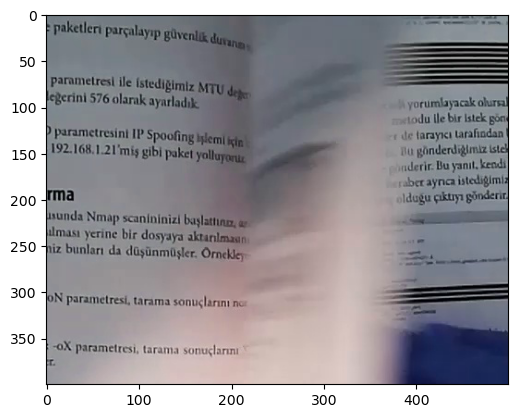

In [83]:
# test the following image of a page being flipped in the model
img_flip = cv2.imread(r"C:\Users\krodr\Downloads\AI machine learning projects\images\testing\flip\0001_000000020.jpg")[500:900, 250:750]
plt.imshow(img_flip, cmap='gray')


In [84]:
predict_flip(r"C:\Users\krodr\Downloads\AI machine learning projects\images\testing\flip\0001_000000020.jpg", 'Y') #the model correctly predicts an image where the page is being flipped

1/1 [==============================] - 0s 52ms/step
This is an image of a page being flipped


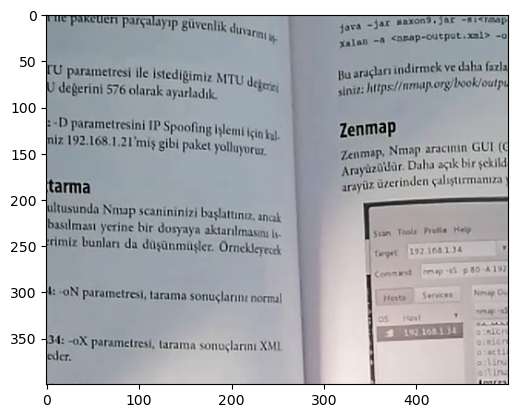

In [83]:
# test the following image of a page not flipped in the model
img_noflip = cv2.imread(r"C:\Users\krodr\Downloads\AI machine learning projects\images\testing\notflip\0001_000000014.jpg")[500:900, 250:750]
plt.imshow(img_noflip, cmap='gray')

In [85]:
predict_flip(r"C:\Users\krodr\Downloads\AI machine learning projects\images\testing\notflip\0001_000000014.jpg", 'Y') 
             #the model correctly predicts an image where the page is not being flipped

1/1 [==============================] - 0s 17ms/step
This is not an image of page flipping


In [86]:
# function to predict if a series of images contain an image of a page being flipped. Folder containing the images to be 
# provided as folder path

def image_series (folder_path):
    X_seq = np.empty(shape = (0,200,250,3))
    for file in os.scandir(folder_path):
        img = cv2.imread(file.path)[500:900, 250:750] #read and crop the image
        scaled_img = cv2.resize(img, (250,200))
        img_norm = (scaled_img/255).reshape(1,200,250,3)
        X_seq = np.vstack((X_seq,img_norm))#stack
        y_predict = (model3.predict(X_seq)>0.5).astype('int16')
        
    if 1 in y_predict:
        print('Flipping action is detected in the image sequence')
    else: print('Flipping action is NOT detected in the image sequence')
    return y_predict

In [87]:
img_seq_path = (r"C:\Users\krodr\Downloads\AI machine learning projects\images\testing\flip")   

In [88]:
image_series(img_seq_path) #the image sequence has several images where the page is being turned (5 images).
# This is correctly identified by the above function using the trained model

8/8 [==============================] - 1s 114ms/step


KeyboardInterrupt: 

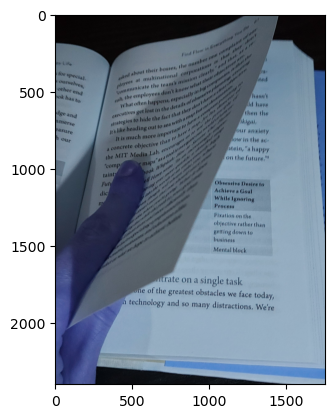

In [90]:
for file in os.scandir(r"C:\Users\krodr\Downloads\AI machine learning projects\images\testing\myflips"):
    img_plt = cv2.imread(file.path)
    plt.imshow(img_plt, cmap = 'gray') #take a custom picture to test the model, book doesn't matter. 

In [91]:
img_plt.shape

(2400, 1752, 3)

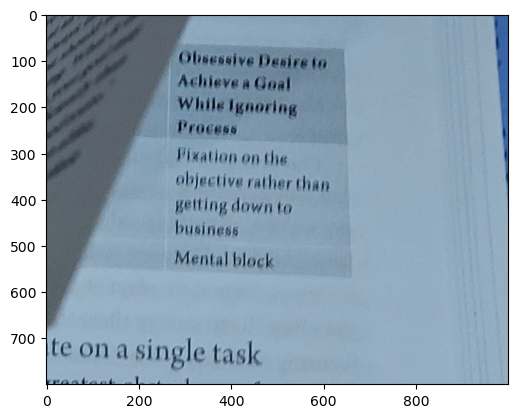

In [92]:
#similar to the original images from the dataset, following cropping will be done to exclude the hands as much as possible
img_plt_crop = img_plt[1000:1800,750:1750]
plt.imshow(img_plt_crop, cmap='gray')

In [122]:
# create a separate function to read, crop and resize the images taken by me
def predict_flip2 (image, print_output):
    img = cv2.imread(image)[1000:1800, 750:1750]
    scaled_img = cv2.resize(img, (250,200))
    img_norm = (scaled_img/255).reshape(1,200,250,3)
    y_pred = (model3.predict(img_norm)>0.5).astype('int16')
    y_pred = model3.predict(img_norm)
    print(y_pred[0])
    if print_output == 'Y':
        if y_pred == 0:
            print('This is not an image of page flipping')
        else: print('This is an image of a page being flipped')
    else: return y_pred

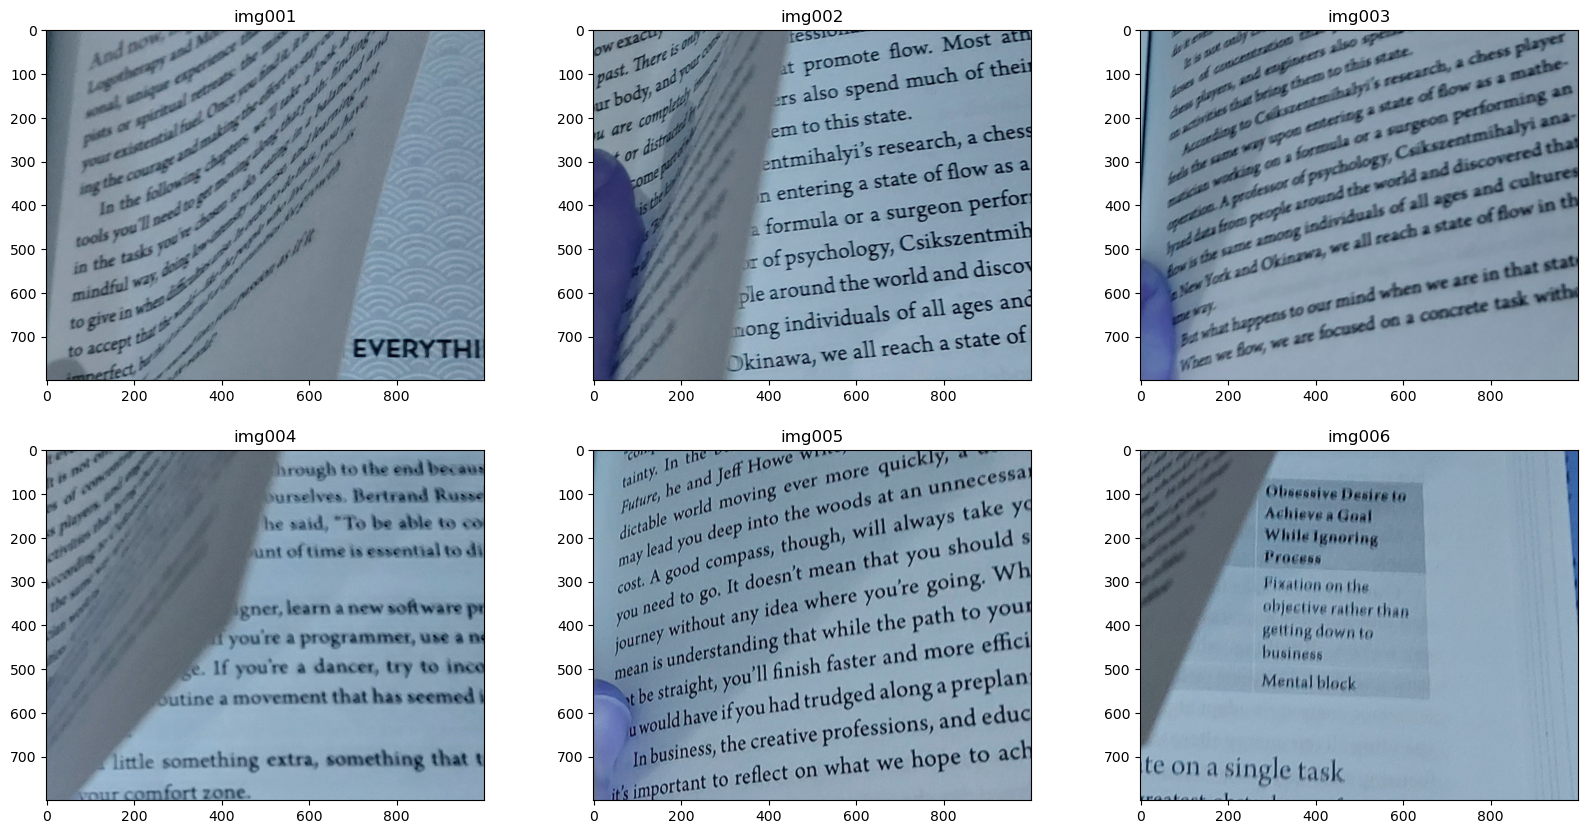

In [123]:
#following 6 test images taken by me were tested using the model

ind = 1
plt.subplots(figsize=(20,10))
for file in os.scandir(r"C:\Users\krodr\Downloads\AI machine learning projects\images\testing\myflips"):
    plt.subplot(2, 3, ind)
    img_plt = cv2.imread(file.path)[1000:1800, 750:1750]
    plt.imshow(img_plt, cmap='gray')
    plt.title('img00'+str(ind))
    ind +=1

In [124]:
for file in os.scandir(r"C:\Users\krodr\Downloads\AI machine learning projects\images\testing\myflips"):
    print('IMG FILE: ',file.path)
    predict_flip2(file.path, 'Y')
   
    
# all the test images were classified correctly when random image augmentation was applied

IMG FILE:  C:\Users\krodr\Downloads\AI machine learning projects\images\testing\myflips\20230109_183608.jpg
1/1 [==============================] - 0s 22ms/step
[0.99999994]
This is an image of a page being flipped
IMG FILE:  C:\Users\krodr\Downloads\AI machine learning projects\images\testing\myflips\20230109_183619.jpg
1/1 [==============================] - 0s 21ms/step
[0.9999408]
This is an image of a page being flipped
IMG FILE:  C:\Users\krodr\Downloads\AI machine learning projects\images\testing\myflips\20230109_183627.jpg
1/1 [==============================] - 0s 19ms/step
[0.9890805]
This is an image of a page being flipped
IMG FILE:  C:\Users\krodr\Downloads\AI machine learning projects\images\testing\myflips\20230109_183639.jpg
1/1 [==============================] - 0s 20ms/step
[1.]
This is an image of a page being flipped
IMG FILE:  C:\Users\krodr\Downloads\AI machine learning projects\images\testing\myflips\20230109_183650.jpg
1/1 [==============================] - 0s 19ms

In [125]:
!mkdir -p saved_model #create a directory to save the model

In [126]:
model3.save('./saved_model/augmentation_model', save_format = 'h5') # with augmentation layers, must use the s

In [127]:
# model can be loaded as follows:
model_test = tf.keras.models.load_model('./saved_model/augmentation_model')

In [128]:
#create a new function to predict flipping using the loaded model

def predict_flip3 (image, print_output):
    img = cv2.imread(image)[1000:1800, 750:1750]
    scaled_img = cv2.resize(img, (250,200))
    img_norm = (scaled_img/255).reshape(1,200,250,3)
    y_pred = (model_test.predict(img_norm)>0.5).astype('int16')
    y_pred = model3.predict(img_norm)
    print(y_pred[0])
    if print_output == 'Y':
        if y_pred == 0:
            print('This is not an image of page flipping')
        else: print('This is an image of a page being flipped')
    else: return y_pred

In [130]:
# check the functionality of the loaded model by classifying the images taken by me.
for file in os.scandir(r"C:\Users\krodr\Downloads\AI machine learning projects\images\testing\myflips"):
    print('IMG FILE: ',file.path)
    predict_flip3(file.path, 'Y')
#the loaded model performs as expected

IMG FILE:  C:\Users\krodr\Downloads\AI machine learning projects\images\testing\myflips\20230109_183608.jpg
1/1 [==============================] - 0s 21ms/step
[0.99999994]
This is an image of a page being flipped
IMG FILE:  C:\Users\krodr\Downloads\AI machine learning projects\images\testing\myflips\20230109_183619.jpg
1/1 [==============================] - 0s 21ms/step
[0.9999408]
This is an image of a page being flipped
IMG FILE:  C:\Users\krodr\Downloads\AI machine learning projects\images\testing\myflips\20230109_183627.jpg
1/1 [==============================] - 0s 19ms/step
[0.9890805]
This is an image of a page being flipped
IMG FILE:  C:\Users\krodr\Downloads\AI machine learning projects\images\testing\myflips\20230109_183639.jpg
1/1 [==============================] - 0s 21ms/step
[1.]
This is an image of a page being flipped
IMG FILE:  C:\Users\krodr\Downloads\AI machine learning projects\images\testing\myflips\20230109_183650.jpg
1/1 [==============================] - 0s 22ms